# **TTI109 - Estatística**
# **Laboratório 05 - Estatística Descritiva 4**
# **Visualização de Dados**

Nessa aula vamos aprender a construir:

- Histograma
   - Frequência Absoluta
   - Frequência Relativa
- Polígono de Frequência
   - Frequência Absoluta
   - Frequência Relativa
- Ogiva ou Frequência Acumulada
- Pareto
- Setorial (circular) ou Pizza
- Dados Emparelhados
   - Dispersão
   - Séries Temporais
- Boxplot

# **Exercício: Análise de Vendas em uma Loja de Eletrônicos**

Uma loja de eletrônicos acompanhou suas vendas diárias ao longo de 30 dias. Além disso, a loja registrou o número de produtos vendidos por categoria (TVs, laptops, celulares, tablets) e os preços correspondentes. O objetivo é utilizar esses dados para criar diversos gráficos que permitam uma análise completa das vendas.

### **Dados Fornecidos**

**Vendas Diárias (número de unidades vendidas por dia durante 30 dias):**

```
[12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]
```

**Vendas por Categoria (número de unidades vendidas e preços por categoria):**

- TVs: 60 unidades, preço médio (em Reais) 2.000,00
- Laptops: 80 unidades, preço médio (em Reais) 3.500,00
- Celulares: 200 unidades, preço médio (em Reais) 1.200,00
- Tablets: 50 unidades, preço médio (em Reais) 1.800,00
- Datas de Vendas (para séries temporais): Dias 1 a 30 do mês

**Construa os Gráficos:**

- **Histograma**
  - **Frequência:** Distribua as vendas diárias em intervalos (por exemplo, 5 intervalos) e crie um histograma para mostrar a frequência das vendas.
  - **Frequência Relativa:** Construa o mesmo histograma, mas com a frequência relativa (proporção das vendas).
- **Polígono de Frequência**
  - **Frequência:** Construa um polígono de frequência conectando os pontos médios das barras do histograma de frequência.
  - **Frequência Relativa:** Construa um polígono de frequência relativo conectando os pontos médios das barras do histograma de frequência relativa.
- **Ogiva ou Frequência Acumulada**
  - Construa uma ogiva utilizando as vendas diárias para mostrar a frequência acumulada.
- **Gráfico de Pareto**
  - Com base nas vendas por categoria, crie um gráfico de Pareto mostrando as unidades vendidas por categoria em ordem decrescente e a linha de frequência acumulada.
- **Gráfico Setorial (Pizza)**
  - Construa um gráfico de pizza para mostrar a participação de cada categoria no total de unidades vendidas.
- **Dados Emparelhados**
  - **Dispersão:** Relacione o número de unidades vendidas com o preço médio dos produtos e construa um gráfico de dispersão.
  - **Séries Temporais:** Construa um gráfico de linhas para mostrar as vendas ao longo dos 30 dias.
- **Boxplot**
  - Construa um boxplot das vendas diárias para analisar a distribuição, mediana e possíveis outliers.

### **Criação dos DafaFrames com os dados fornecidos**

In [1]:
# Criação dos DafaFrames com os dados fornecidos

# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq

# Criar DataFrame com as vendas diárias
vendas_diarias = [12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]
vendas = pd.DataFrame({
    'Vendas Diárias': vendas_diarias
})

# Criar DataFrame com vendas por categoria
categorias = ['TVs', 'Laptops', 'Celulares', 'Tablets']
unidades_vendidas = [60, 80, 200, 50]
precos_medios = [2000, 3500, 1200, 1800]
# Construção do DataFrame
vendas_categoria = pd.DataFrame({
    'Categoria': categorias,
    'Unidades Vendidas': unidades_vendidas,
    'Preço Médio (R$)': precos_medios
})

# Imprime as tabelas
display(vendas)
display(vendas_categoria)

# Exibindo estatísticas descritivas
print(vendas.describe())

,Vendas Diárias
0,12
1,15
2,14
3,10
4,12
5,16
6,18
7,17
8,14
9,19


,Categoria,Unidades Vendidas,Preço Médio (R$)
0,TVs,60,2000
1,Laptops,80,3500
2,Celulares,200,1200
3,Tablets,50,1800


       Vendas Diárias
count       30.000000
mean        15.933333
std          3.973475
min          9.000000
25%         13.000000
50%         15.500000
75%         19.000000
max         23.000000


### **Criando a tabela de frequências**

In [2]:
# Usarenos 5 classes (bins)
n_classes = 5

# Valores máximo e mínimo
v_max = vendas['Vendas Diárias'].max()
v_min = vendas['Vendas Diárias'].min()

# Amplitude e limites das classes de forma manual
amplitude = round((v_max - v_min) / n_classes)

# Cria uma lista de limites das classes. A 'amplitude' define a largura de cada classe
# O '+2' assegura que o valor máximo seja incluído na última classe
classes = np.arange(v_min, v_max + 2, amplitude)

# Cria a tabela de frequências
tabela_frequencias = vendas['Vendas Diárias'].value_counts(bins = n_classes).sort_index()
tabela_frequencias = tabela_frequencias.reset_index()
tabela_frequencias.columns = ['Classe', 'Frequência']

# Atualiza a tabela de frequências
tabela_frequencias['Classe'] = tabela_frequencias['Frequência'].index
tabela_frequencias['Pontos médios'] = (classes[:-1] + classes[1:]) / 2
tabela_frequencias['Frequência relativa'] = tabela_frequencias['Frequência'].values/len(vendas['Vendas Diárias'])
tabela_frequencias['Frequência acumulada'] = tabela_frequencias['Frequência'].values.cumsum()

# Imprime a tabela
display(tabela_frequencias)

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,0,4,10.5,0.133333,4
1,1,8,13.5,0.266667,12
2,2,7,16.5,0.233333,19
3,3,6,19.5,0.200000,25
4,4,5,22.5,0.166667,30


### **1 - Histograma  Frequência**

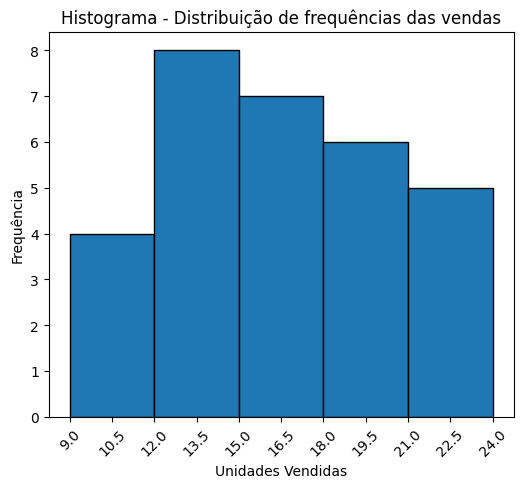

In [3]:
# 1. Histograma - Frequência

plt.figure(figsize=(6, 5))
plt.hist(x=tabela_frequencias['Pontos médios'], bins=classes, weights=tabela_frequencias['Frequência'], edgecolor='black')
# vendas['Vendas Diárias'].plot.hist(bins=classes, edgecolor='black')
plt.title('Histograma - Distribuição de frequências das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

# Usa os limites das classes e os pontos médios como major ticks no eixo x. Rotaciona o texto em 45 graus
plt.xticks(np.concatenate([classes, tabela_frequencias['Pontos médios']]), rotation=45)

# Mostra o gráfico
plt.show()

### **2. Histograma - Frequência Relativa**

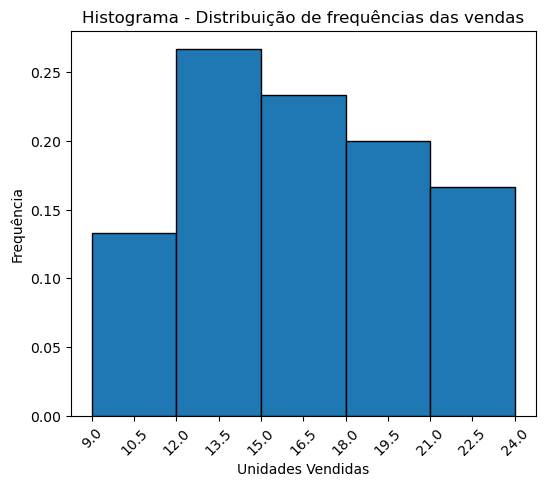

In [76]:
# 2. Histograma - Frequência Relativa

plt.figure(figsize=(6, 5))
plt.hist(x=tabela_frequencias['Pontos médios'], bins=classes, weights=tabela_frequencias['Frequência relativa'], edgecolor='black')
# vendas['Vendas Diárias'].plot.hist(bins=classes, edgecolor='black')
plt.title('Histograma - Distribuição de frequências das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

# Usa os limites das classes e os pontos médios como major ticks no eixo x. Rotaciona o texto em 45 graus
plt.xticks(np.concatenate([classes, tabela_frequencias['Pontos médios']]), rotation=45)

# Mostra o gráfico
plt.show()

### **3. Polígono de Frequência - Frequência**

Ponto médio fictício à esquerda = 7.5
Ponto médio fictício à direita = 25.5


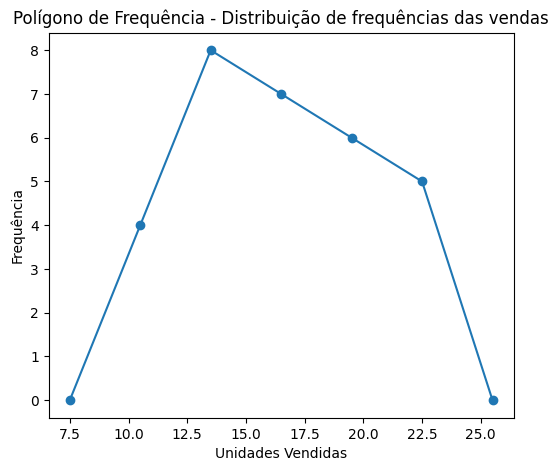

In [4]:
# 3. Polígono de Frequência - Frequência

# Cálculo dos pontos médios fictícios
fic_esq = [tabela_frequencias['Pontos médios'].iloc[0] - amplitude]
print(f'Ponto médio fictício à esquerda = {fic_esq[0]}')
fic_dir = [tabela_frequencias['Pontos médios'].iloc[-1] + amplitude]
print(f'Ponto médio fictício à direita = {fic_dir[0]}')

# Construção dos dados com inserção dos pontos médios fictícios
x_data = np.concatenate([fic_esq, tabela_frequencias['Pontos médios'], fic_dir])
y_data = np.concatenate([[0], tabela_frequencias['Frequência'], [0]])

# Plota o gráfico
plt.figure(figsize=(6, 5))
plt.plot(x_data, y_data, marker='o')
plt.title('Polígono de Frequência - Distribuição de frequências das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

# Mostra o gráfico
plt.show()

### **4. Polígono de Frequência - Frequência Relativa**

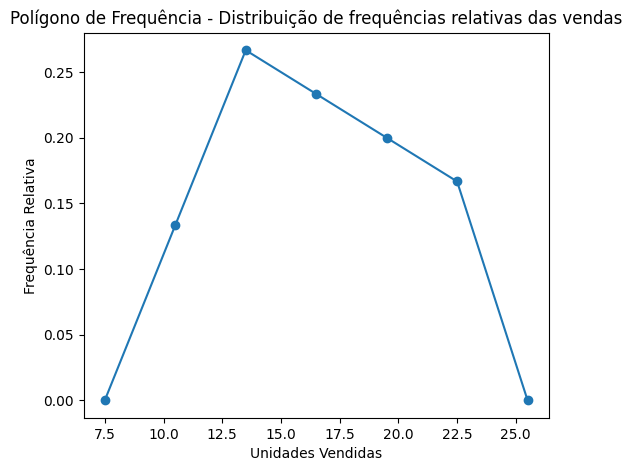

In [5]:
# 4. Polígono de Frequência - Frequência Relativa

# Cálculo dos pontos médios fictícios continuam os mesmos de antes, assim como 'x_data'
# Construção dos dados com inserção dos pontos médios fictícios
y_data = np.concatenate([[0], tabela_frequencias['Frequência relativa'], [0]])

# Plota o gráfico
plt.figure(figsize=(6, 5))
plt.plot(x_data, y_data, marker='o')
plt.title('Polígono de Frequência - Distribuição de frequências relativas das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Relativa')

# Mostra o gráfico
plt.show()

### **5. Ogiva (Frequência Acumulada)**

[9]
3
[ 9 12 15 18 21 24]


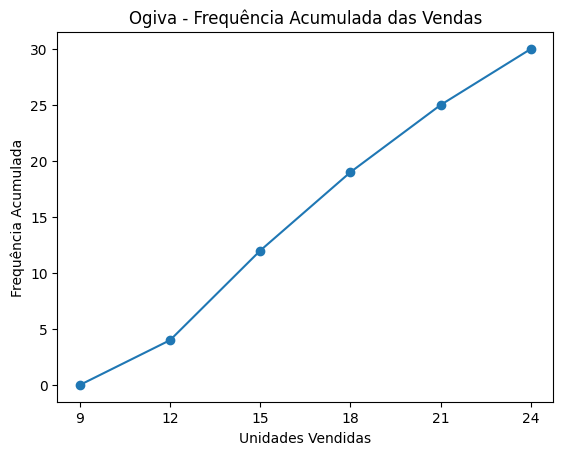

In [9]:
# 5. Ogiva (Frequência Acumulada)

# Cálculo dos pontos médios fictícios
ini_ogiva = [classes[1]-amplitude]
print(ini_ogiva)
print(amplitude)
print(classes)
# Adicionar as fronteiras superiores das classes ao eixo x
# e inserção do ponto inicial acumulado em zero
x_data = ini_ogiva + [limite for limite in classes[1:]]
y_data = np.concatenate([[0], tabela_frequencias['Frequência acumulada']])

# Plotagem da ogiva
plt.plot(x_data, y_data, marker='o')

# Títulos
plt.title('Ogiva - Frequência Acumulada das Vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Acumulada')

# Usa os pontos médios como major ticks no eixo x
plt.xticks(x_data)

# Mostra o gráfico
plt.show()

### **6. Gráfico de Pareto**

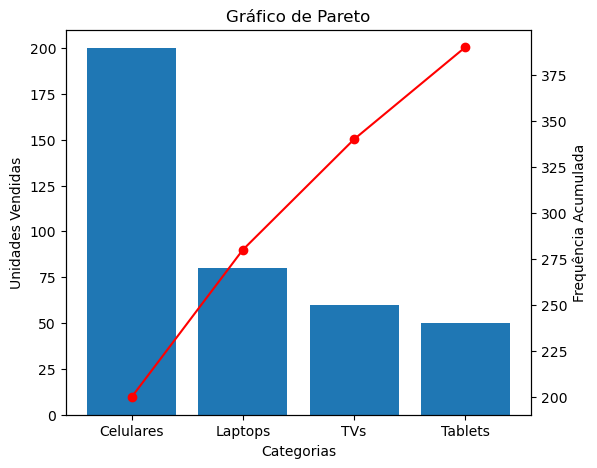

In [84]:
# 6. Gráfico de Pareto

# Ordena os valores em ordem decrescente
decrescente_vendas_categoria = vendas_categoria.sort_values(by='Unidades Vendidas', ascending=False)
decrescente_vendas_categoria['Frequência Acumulada'] = decrescente_vendas_categoria['Unidades Vendidas'].cumsum()

# Agora teremos 2 eixos y
fig, ax = plt.subplots(figsize=(6, 5))

# Cria o primeiro eixo x vinculado ao eixo y à esquerda e plota o gráfico no eixo y à esquerda
ax.bar(decrescente_vendas_categoria['Categoria'], decrescente_vendas_categoria['Unidades Vendidas'])

# Copia o segundo eixo x vinculado ao eixo y à direita
ax2 = ax.twinx()
# Plota o gráfico vinculado ao eixo y à direita
ax2.plot(decrescente_vendas_categoria['Categoria'], decrescente_vendas_categoria['Frequência Acumulada'], 
         color='r', marker='o', label='Frequência Acumulada')

# Títulos
ax.set_title('Gráfico de Pareto')
ax.set_xlabel('Categorias')
ax.set_ylabel('Unidades Vendidas')
ax2.set_ylabel('Frequência Acumulada')

# Mostra o gráfico
plt.show()


### **7. Gráfico Setorial (Pizza)**

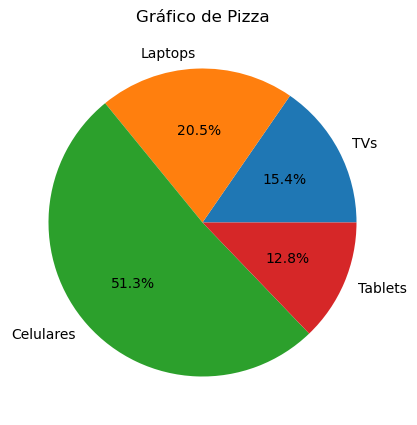

In [86]:
# 7. Gráfico Setorial (Pizza)

plt.figure(figsize=(5, 5))

# autopct: formata os números que serão exibidos em cada fatia da pizza
# '%1.1f%%':
#    %: Indica que você está formatando um valor de ponto flutuante (float)
#    1.1f: o número tem pelo menos 1 dígito antes do ponto decimal e uma casa decimal
#    Exemplo: 25% será exibido como 25.0%
#    %%: porcentagem dupla para exibir uma vez o símbolo '%'
plt.pie(vendas_categoria['Unidades Vendidas'], labels=vendas_categoria['Categoria'], autopct='%1.1f%%')

# Título
plt.title('Gráfico de Pizza')

# Mostra o gráfico
plt.show()

### **8. Dados Emparelhados - Dispersão**

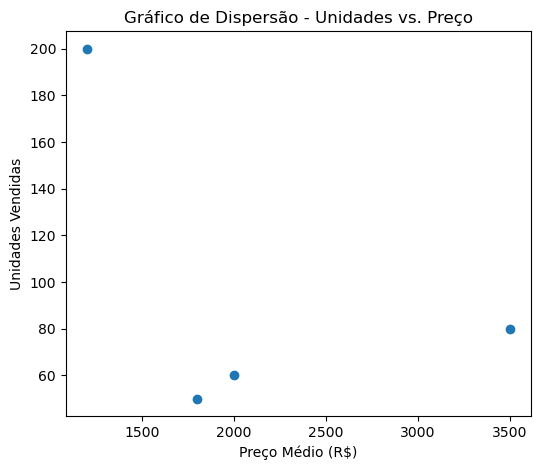

In [88]:
# 8. Dados Emparelhados - Dispersão

plt.figure(figsize=(6, 5))
plt.scatter(vendas_categoria['Preço Médio (R$)'], vendas_categoria['Unidades Vendidas'])

# Títulos
plt.title('Gráfico de Dispersão - Unidades vs. Preço')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Unidades Vendidas')

# Usa os pontos médios como major ticks no eixo x
# plt.xticks(x_data)

# Mostra o gráfico
plt.show()

### **9. Dados Emparelhados - Séries Temporais**

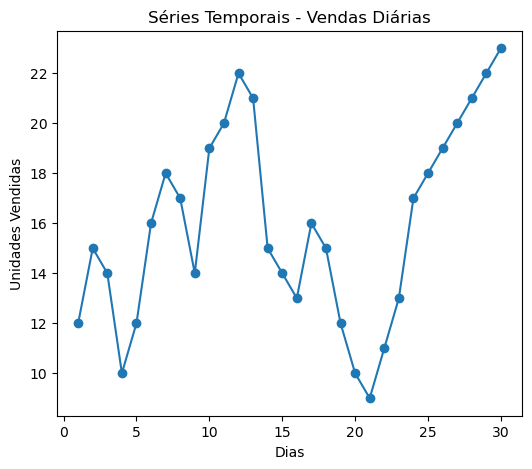

In [90]:
# 9. Dados Emparelhados - Séries Temporais

plt.figure(figsize=(6, 5))
plt.plot(vendas['Vendas Diárias'].index + 1, vendas['Vendas Diárias'], marker='o')

# Títulos
plt.title('Séries Temporais - Vendas Diárias')
plt.xlabel('Dias')
plt.ylabel('Unidades Vendidas')

# Mostra o gráfico
plt.show()

### **10. Boxplot**

       Vendas Diárias
count       30.000000
mean        15.933333
std          3.973475
min          9.000000
25%         13.000000
50%         15.500000
75%         19.000000
max         23.000000


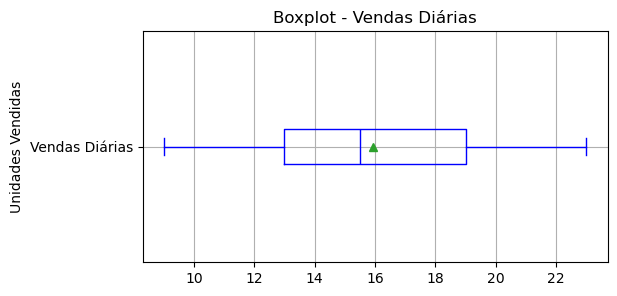

In [92]:
# 10. Boxplot

# Exibindo estatísticas descritivas
print(vendas.describe())

# Gráfico
vendas.boxplot(column=['Vendas Diárias'], color='blue', vert=False, showmeans=True, figsize=(6, 3))

# Títulos
plt.title('Boxplot - Vendas Diárias')
plt.ylabel('Unidades Vendidas')
plt.suptitle('')

# Mostra o gráfico
plt.show()

# **EXTRA: Análise dos quartis de um painel de dados**

Um diagrama boxplot (ou caixa-e-bigode) é uma ferramenta de análise exploratória que destaca características importantes de um conjunto de dados.
Os dados utilizados no exercício anterior de uma Loja de Eletrônicos são simples, pois o intuitofoi deé aprender a utilizara ferramenta Python.
 Para expandir o uso de boxplots, vamos importar um grande conjunto de dados levantados a partir das gorjetas dadas por clientes de um restaurante.

O conjunto de dados possui os seguintes parâmetros:
- **valor_total:** valor total gasto no restaurante
- **gorjeta:** valor da gorjeta
- **sexo:** como o cliente pagante se identificou
- **fumante:** cliente fumante ou não
- **dia:** dia do atendimento
- **hora:** horário do atendimento
- **tamanho:** número de pessoas à mesa.

In [94]:
import numpy as np 
import matplotlib.pyplot as plt 

# Importação do conjunto de dados
gorjetas = pd.read_csv("gorjetas.csv")
print('5 primeiras linhas do conjunto de dados:')
display(gorjetas.head())

# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0,
                            interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)

# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0,
                              interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)

# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

5 primeiras linhas do conjunto de dados:


,valor_total,gorjeta,sexo,fumante,dia,hora,tamanho
0,16.99,1.01,Mulher,Nao,Domingo,Jantar,2
1,10.34,1.66,Homem,Nao,Domingo,Jantar,3
2,21.01,3.50,Homem,Nao,Domingo,Jantar,3
3,23.68,3.31,Homem,Nao,Domingo,Jantar,2
4,24.59,3.61,Mulher,Nao,Domingo,Jantar,4


Tabela com os quartis para cada coluna numérica:


,valor_total,gorjeta,tamanho
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0


Tabela com percentis customizados:


,valor_total,gorjeta,tamanho
0.1,10.340,1.5,2.0
0.3,14.249,2.0,2.0
0.8,26.098,4.0,3.0


Análise exploraória:


,valor_total,gorjeta,tamanho
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Boxplot - Painéis de dados

O uso do método boxplot() tem seu total potencial realizado quando os dados são um DataFrame.

Vamos checar a distribuição do valor das contas por dia de funcionamento do restaurante.

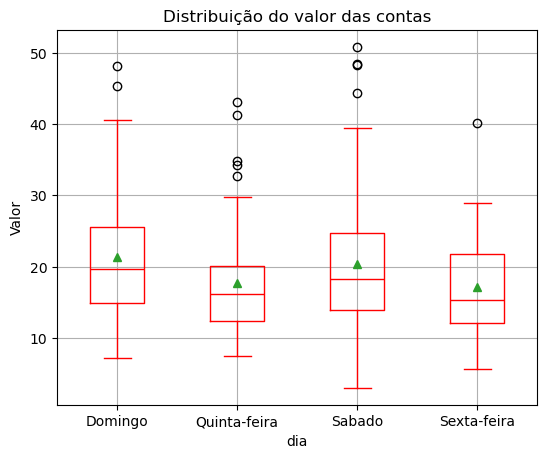

In [96]:
gorjetas.boxplot(by='dia', column=['valor_total'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das contas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Agora, vamos examinar a distribuição das gorjetas por dia de funcionamento do restaurante

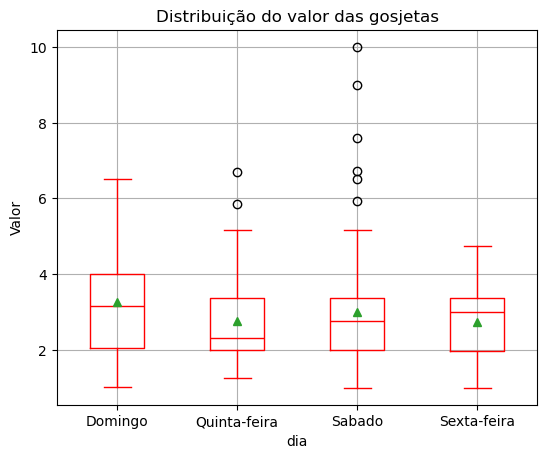

In [98]:
gorjetas.boxplot(by='dia', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Distribuição das gorjetas agrupada por período de funcionamento

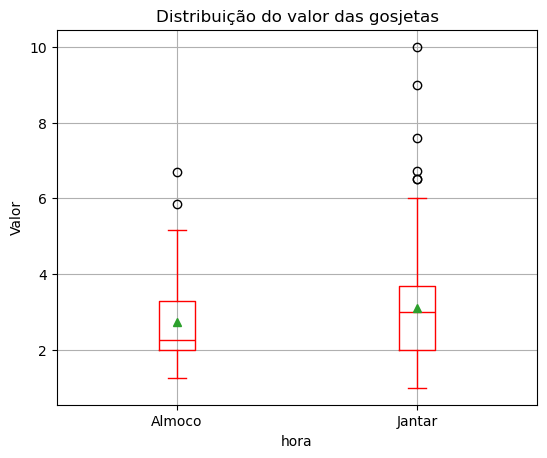

In [100]:
gorjetas.boxplot(by='hora', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Também é possível agrupar a distribuição de gorjetas usando dois ou mais fatores.

Aqui, vamos agrupar por dia de funcionamento e como o cliente pagante se identificou

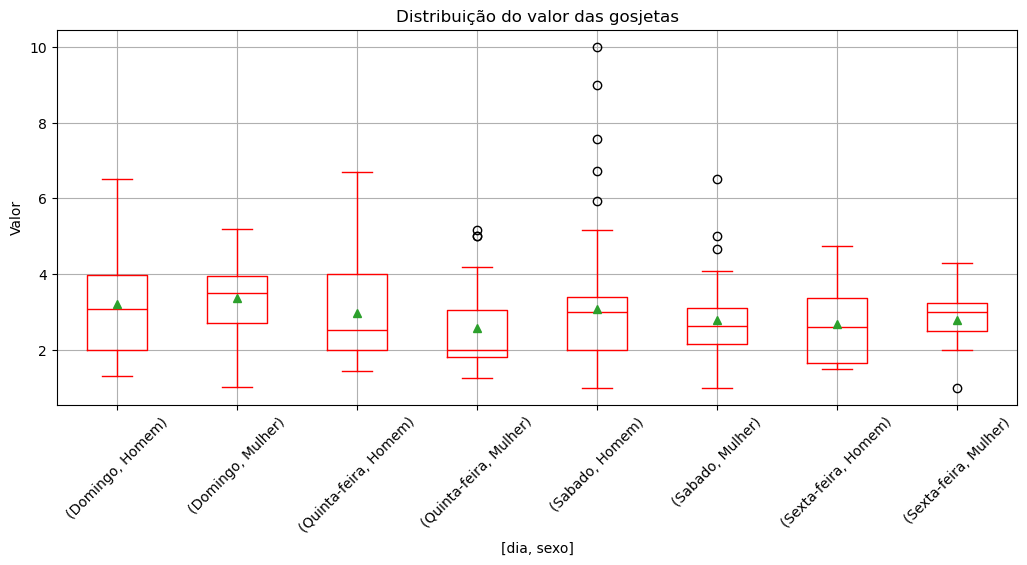

In [102]:
gorjetas.boxplot(by=['dia', 'sexo'], column=['gorjeta'], color='red', showmeans=True, figsize=(12, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Rotacionar os textos do eixo x em 45 graus
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()